In [1]:
from scipy import stats as ss
import pandas as pd
import numpy as np
import seaborn as sns
import pingouin as pg
from statsmodels.stats import multicomp as smsm

In [2]:
from sklearn.datasets import load_iris

In [3]:
cats_df = pd.read_csv('data/cats.csv')
cats_df

,Sex,Bwt,Hwt
0,F,2.0,7.0
1,F,2.0,7.4
2,F,2.0,9.5
3,F,2.1,7.2
4,F,2.1,7.3
...,...,...,...
139,M,3.7,11.0
140,M,3.8,14.8
141,M,3.8,16.8
142,M,3.9,14.4


In [4]:
cats_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 144 entries, 0 to 143
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Sex     144 non-null    object 
 1   Bwt     144 non-null    float64
 2   Hwt     144 non-null    float64
dtypes: float64(2), object(1)
memory usage: 3.5+ KB


In [5]:
mu = 2.6
ss.shapiro(cats_df['Bwt'])

ShapiroResult(statistic=0.9518786668777466, pvalue=6.730248423991725e-05)

In [6]:
x_sample, std, se, df = np.mean(cats_df['Bwt']), np.std(cats_df['Bwt'], ddof=1), ss.sem(cats_df['Bwt']), len(cats_df['Bwt']) - 1

In [7]:
2 * (1 - ss.t.cdf((x_sample - mu) / se, df))

0.002673036256172212

In [8]:
ss.wilcoxon(cats_df['Bwt'] - mu, alternative='two-sided')

WilcoxonResult(statistic=3573.0, pvalue=0.02524520294814093)

<AxesSubplot:>

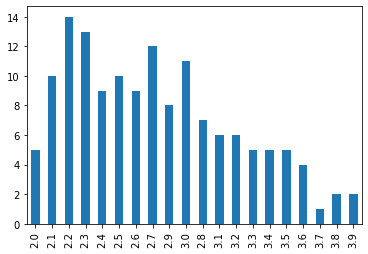

In [9]:
cats_df['Bwt'].value_counts(sort=False).plot.bar()

<AxesSubplot:ylabel='Frequency'>

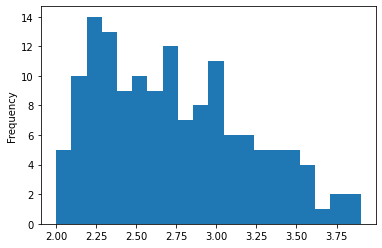

In [10]:
cats_df['Bwt'].plot.hist(bins=20)

In [11]:
data = {'before':[7,3,4,5,2,1,6,6,5,4],
       'after':[8,4,5,6,2,3,6,8,6,5]}
data_df = pd.DataFrame(data)
data_df

,before,after
0,7,8
1,3,4
2,4,5
3,5,6
4,2,2
5,1,3
6,6,6
7,6,8
8,5,6
9,4,5


In [12]:
ss.shapiro(data_df['before']), ss.shapiro(data_df['after'])

(ShapiroResult(statistic=0.9644594192504883, pvalue=0.8352694511413574),
 ShapiroResult(statistic=0.9456835985183716, pvalue=0.6177982091903687))

In [13]:
ss.ttest_1samp(cats_df['Bwt'], popmean=mu)

Ttest_1sampResult(statistic=3.0564867998078107, pvalue=0.0026730362561723613)

In [14]:
ss.ttest_rel(data_df['before'], data_df['after'], alternative='two-sided')

Ttest_relResult(statistic=-4.743416490252569, pvalue=0.0010538712570165528)

In [15]:
female = cats_df.loc[cats_df['Sex'] == 'F', 'Bwt']
male = cats_df.loc[cats_df['Sex'] == 'M', 'Bwt']

In [16]:
ss.levene(female, male)

LeveneResult(statistic=19.43101190877999, pvalue=2.0435285255189404e-05)

In [17]:
ss.ttest_ind(female, male, equal_var=False, alternative='two-sided')

Ttest_indResult(statistic=-8.70948849909559, pvalue=8.831034455859356e-15)

In [18]:
iris_df = pd.read_csv('data/iris.csv')
iris_df

,sepal length,sepal width,petal length,petal width,target
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [35]:
target_list = iris_df['target'].unique()
setosa = iris_df.loc[iris_df['target'] == 'Iris-setosa', 'sepal width']
versicolor = iris_df.loc[iris_df['target'] == 'Iris-versicolor', 'sepal width']
virginica = iris_df.loc[iris_df['target'] == 'Iris-virginica', 'sepal width']

<AxesSubplot:xlabel='target', ylabel='sepal width'>

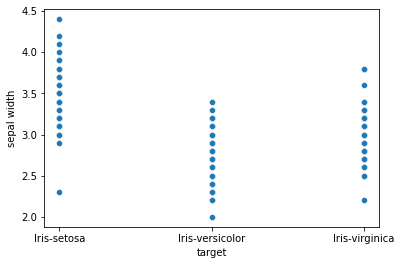

In [20]:
sns.scatterplot(data=iris_df, x='target', y='sepal width')

In [36]:
ss.shapiro(setosa)
ss.shapiro(versicolor)
ss.shapiro(virginica)

ShapiroResult(statistic=0.9673910140991211, pvalue=0.1809043288230896)

In [37]:
ss.levene(setosa, versicolor, virginica)

LeveneResult(statistic=0.6475222363405327, pvalue=0.5248269975064537)

In [38]:
ss.f_oneway(setosa, versicolor, virginica)

F_onewayResult(statistic=47.36446140299382, pvalue=1.3279165184572242e-16)

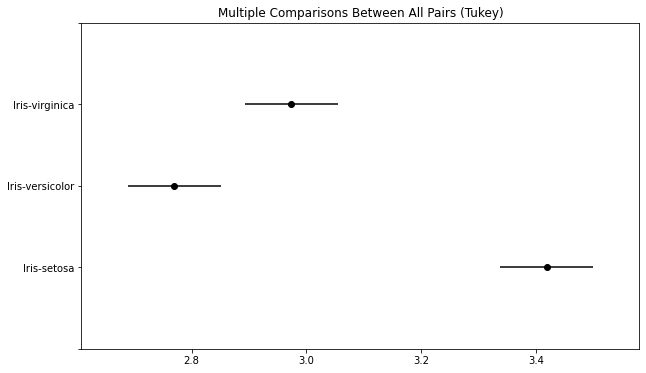

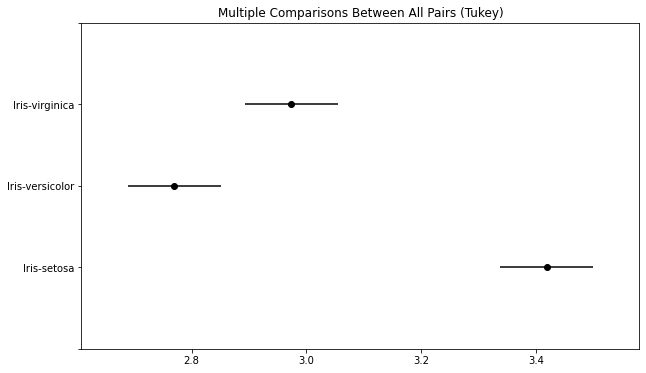

In [42]:
mc = smsm.MultiComparison(data=iris_df['sepal width'], groups=iris_df['target'])
tukeyhsd = mc.tukeyhsd(alpha=0.05)
tukeyhsd.plot_simultaneous()


In [43]:
tukeyhsd.summary()

group1,group2,meandiff,p-adj,lower,upper,reject
Iris-setosa,Iris-versicolor,-0.648,0.0,-0.8092,-0.4868,True
Iris-setosa,Iris-virginica,-0.444,0.0,-0.6052,-0.2828,True
Iris-versicolor,Iris-virginica,0.204,0.009,0.0428,0.3652,True


In [45]:
ss.kruskal(setosa, versicolor, virginica)

KruskalResult(statistic=62.49463010053111, pvalue=2.6882119006774528e-14)

In [46]:
pg.welch_anova(data=iris_df, dv='sepal width', between='target')

,Source,ddof1,ddof2,F,p-unc,np2
0,target,2,97.369597,43.303381,3.519723e-14,0.391881
